# Analyzing RAG Results
In this notebook we:
1. Import Q&A results from out files
2. Study the questions that were rejected by metrics before eval
3. Plot scores from the judge agent.

In [ ]:
!pip install -q transformers langchain

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
results_pdf = pd.read_json('/Users/reggiebain/erdos/course-assistant-bot/out/rag_eval_results_pdf/working/output/rag_chunk:200_embeddings:thenlper~gte-small_rerank:False_reader-model:zephyr-7b-beta.json')
results_pdf.head(1)

,question,true_answer,source_doc,generated_answer,retrieved_docs,test_settings,eval_score_gpt4,eval_feedback_gpt4
0,What is the primary textbook for the course?\n,The primary textbook for the course is Physics...,/kaggle/input/course-bot-data/documents/rbain_...,\n<|system|>\nUsing the information contained ...,"[7th\ned.,\nDouglas\nC.\nGiancoli\n—\nPrimary\...",chunk:200_embeddings:thenlper~gte-small_rerank...,4,The response correctly identifies the primary ...


In [ ]:
# Take further look at pdf q&a
results_full_pdf = pd.read_csv('/Users/reggiebain/erdos/course-assistant-bot/out/rag_eval_results_pdf/working/generated_qa.csv')
print(f"Number of PDF Synthetic Questions that were cut: {len(results_full_pdf) - len(results_pdf)}")

Number of PDF Synthetic Questions that were cut: 7


In [8]:
results_md = pd.read_json('/Users/reggiebain/erdos/course-assistant-bot/out/rag_eval_results_md/working/output/rag_chunk:200_embeddings:thenlper~gte-small_rerank:False_reader-model:zephyr-7b-beta.json')
results_md.head(1)

,question,true_answer,source_doc,generated_answer,retrieved_docs,test_settings,eval_score_gpt4,eval_feedback_gpt4
0,What is the course code for the Introduction t...,COMP_SCI 110,/kaggle/input/course-bot-data/documents/cbain_...,\n<|system|>\nUsing the information contained ...,[The second goal of the course is to introduce...,chunk:200_embeddings:thenlper~gte-small_rerank...,5,"The response provided is completely correct, a..."


In [54]:
# Take further look at md q&a
results_md_full = pd.read_csv('/Users/reggiebain/erdos/course-assistant-bot/out/rag_eval_results_md/working/generated_qa.csv')
print(f"Number of MD Synthetic Questions that were cut: {len(results_md_full) - len(results_md)}")

Number of MD Synthetic Questions that were cut: 8


In [77]:
results_html = pd.read_json('/Users/reggiebain/erdos/course-assistant-bot/out/rag_eval_results_html/working/output/rag_chunk:200_embeddings:thenlper~gte-small_rerank:False_reader-model:zephyr-7b-beta.json')
results_html.head(1)

,question,true_answer,source_doc,generated_answer,retrieved_docs,test_settings,eval_score_gpt4,eval_feedback_gpt4
0,How will the course policy be applied at the e...,The course policy will be automatically applie...,/kaggle/input/course-bot-data/cbain_syllabus_1...,\n<|system|>\nUsing the information contained ...,[Students may request extensions on 2 assignme...,chunk:200_embeddings:thenlper~gte-small_rerank...,5,Feedback: The response correctly identifies th...


In [78]:
# Take further look at html q&a
results_full_html = pd.read_csv('/Users/reggiebain/erdos/course-assistant-bot/out/rag_eval_results_html/working/generated_qa.csv')
print(f"Number of HTML Synthetic Questions that were cut: {len(results_full_html) - len(results_html)}")

Number of HTML Synthetic Questions that were cut: 5


Next we'll take a look at some questions that were cut

In [81]:
results_all_pdf = pd.read_csv('../out/rag_eval_results_pdf/working/generated_qa.csv')
all, kept = list(results_all_pdf.question), list(results_pdf.question)
rejected = [q for q in all if q not in kept]
rejected

['What happens if students wear headphones during class instead of actively participating?\n',
 'What is one way students can ask questions to the instructor outside of office hours?\n',
 'What platform do students use to submit homework assignments and complete in-class tests?\n',
 'How can students get one-on-one help for tasks like learning how to study more effectively, creating a study schedule, organizing materials, or setting priorities at the Center for Academic Success?\n',
 'When is the third exam scheduled in the course?\n',
 'What is the commitment that academic integrity represents according to the International Center for Academic Integrity website?\n']

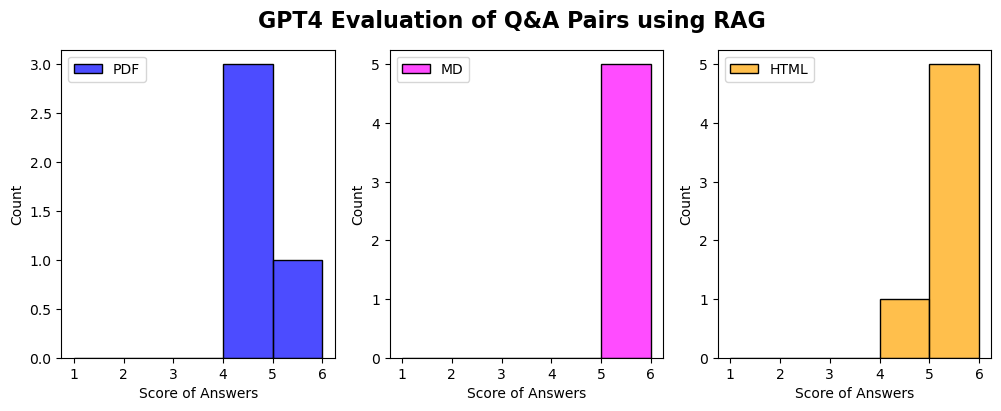

In [80]:
# Plot histograms
#plt.hist(results, bins=30, alpha=0.7, color='blue', label='Dataset 1')  # Histogram 1
#plt.hist(data2, bins=30, alpha=0.7, color='orange', label='Dataset 2')  # Histogram 2
bins = [1,2,3,4,5,6]
fig, axes = plt.subplots(1,3, figsize=(12,4))
sns.histplot(data=results_pdf.eval_score_gpt4, bins = bins, alpha = 0.7, color='blue', label='PDF', ax=axes[0])
sns.histplot(data= results_md.eval_score_gpt4, bins=bins, alpha=0.7, color='magenta', label='MD', ax=axes[1])
sns.histplot(results_html.eval_score_gpt4, bins=bins, alpha=0.7, color = 'orange', label='HTML', ax=axes[2])
# Add labels and title
for i in range(3):
    axes[i].set_xlabel('Score of Answers')
    axes[i].legend()
plt.suptitle('GPT4 Evaluation of Q&A Pairs using RAG', fontweight='bold', fontsize=16)
plt.savefig('/Users/reggiebain/erdos/course-assistant-bot/images/gpt4_rag_eval.png')
plt.show()

In [83]:
results_html.columns

Index(['question', 'true_answer', 'source_doc', 'generated_answer',
       'retrieved_docs', 'test_settings', 'eval_score_gpt4',
       'eval_feedback_gpt4'],
      dtype='object')

In [89]:
# Create dataframe of q&a for all analyzed syllabi
questions_df = pd.DataFrame()
questions_df['question'] = list(results_html.question) + list(results_pdf.question) + list(results_md.question)
questions_df['generated_answer'] = list(results_html.generated_answer) + list(results_pdf.generated_answer) + list(results_md.generated_answer)
questions_df['true_answer'] = list(results_html.true_answer) + list(results_pdf.true_answer) + list(results_md.true_answer)

# Grab the relevant portion of the generated answers
questions_df['generated_answer'] = questions_df['generated_answer'].str.split('<|assistant|>').str[-1]

questions_df.to_csv('/Users/reggiebain/erdos/course-assistant-bot/out/qa_baseline.csv')
questions_df.head()

,question,generated_answer,true_answer
0,How will the course policy be applied at the e...,"\nAccording to Document 1, the policy for drop...",The course policy will be automatically applie...
1,What is the grading range for an F grade in th...,"\nIn the Graduate course, the range for an F g...",The grading range for an F grade in the Gradua...
2,What is considered a violation of Northwestern...,"\nAnswer: According to the provided context, e...",Turning in code that you yourself did not both...
3,How many extensions can a student request for ...,"\nAccording to Document 0, a student may reque...",A student can request extensions on 2 assignme...
4,What is programming used for?\n,"s and peer mentors. Overall, programming is a ...",Programming is used as a powerful medium for c...


In [87]:
print(questions_df['generated_answer'][0])


<|system|>
Using the information contained in the context,
give a comprehensive answer to the question.
Respond only to the question asked, response should be concise and relevant to the question.
Provide the number of the source document when relevant.
If the answer cannot be deduced from the context, do not give an answer.</s>
<|user|>
Context:

Extracted documents:
Document 0:::
Students may request extensions on 2 assignments throughout the quarter.

The policy is deliberate in that you, as a student, must actively consider at least 24 hours in advance of the deadline that you will need extra time to complete this assignment. If you find yourself needing extra time on consecutive assignments, this is a good sign that you need to reach out to someone on the Course Staff for help.

There will be no exceptions to this policy. Once you are granted a waiver, it cannot be voided.

Emergency Grade Erasure

The emergency grade erasure policy acknowledges that often times life situations o

## Comparison with Baseline
- Take set of questions any syllabus should be able to answer
- Feed into LLM without RAG
- Evaluate
- Compare

In [ ]:
EVALUATION_PROMPT = """###Task Description:
An instruction (might include an Input inside it), a response to evaluate, a reference answer that gets a score of 5, and a score rubric representing a evaluation criteria are given.
1. Write a detailed feedback that assess the quality of the response strictly based on the given score rubric, not evaluating in general.
2. After writing a feedback, write a score that is an integer between 1 and 5. You should refer to the score rubric.
3. The output format should look as follows: \"Feedback: {{write a feedback for criteria}} [RESULT] {{an integer number between 1 and 5}}\"
4. Please do not generate any other opening, closing, and explanations. Be sure to include [RESULT] in your output.

###The instruction to evaluate:
{instruction}

###Response to evaluate:
{response}

###Reference Answer (Score 5):
{reference_answer}

###Score Rubrics:
[Is the response correct, accurate, and factual based on the reference answer?]
Score 1: The response is completely incorrect, inaccurate, and/or not factual.
Score 2: The response is mostly incorrect, inaccurate, and/or not factual.
Score 3: The response is somewhat correct, accurate, and/or factual.
Score 4: The response is mostly correct, accurate, and factual.
Score 5: The response is completely correct, accurate, and factual.

###Feedback:"""

In [91]:
# Copy/pasted from GPT4's output
data = {
    "Question": [
        "How will the course policy be applied at the end of the quarter?",
        "What is the grading range for an F grade in the Graduate course?",
        "How many extensions can a student request for assignments during the quarter?",
        "What is programming used for?",
        "Who are the people that can be found in the course staff?",
        "What is the primary textbook for the course?",
        "What is the recommended way to study physics to avoid poor test scores?",
        "What should students bring to the exam according to the instructor?",
        "How many college credit hours can students earn in the General Physics I course?",
        "What is the course code for the Introduction to Computer Programming course?",
        "What is the purpose of edSTEM?",
        "What days are tutorials held in the programming course?",
        "What is the main goal of the course?",
        "What is the latest time accepted for late homework submissions?"
    ],
    "Generated Answer": [
        "Cannot answer.",
        "Cannot answer.",
        "Cannot answer.",
        "Programming is used to instruct computers to perform specific tasks, solve problems, and automate processes.",
        "Cannot answer.",
        "Cannot answer.",
        "Cannot answer.",
        "Cannot answer.",
        "Cannot answer.",
        "Cannot answer.",
        "Cannot answer.",
        "Cannot answer.",
        "Cannot answer.",
        "Cannot answer."
    ]
}
gpt4_output = pd.DataFrame(data)
gpt4_output.to_csv("../out/qa_baseline_with_answers.csv", index=False)


In [94]:
!pip install -q tabulate

In [95]:
print(gpt4_output.to_markdown())

|    | Question                                                                         | Generated Answer                                                                                             |
|---:|:---------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------|
|  0 | How will the course policy be applied at the end of the quarter?                 | Cannot answer.                                                                                               |
|  1 | What is the grading range for an F grade in the Graduate course?                 | Cannot answer.                                                                                               |
|  2 | How many extensions can a student request for assignments during the quarter?    | Cannot answer.                                                                                            

Using GPT4, you can notice that generic questions such as "What is programming used for?" can certainly be answered by an LLM without RAG for retrieving context. However, any question that requires any specificity whatsoever can't be answered.